<a href="https://colab.research.google.com/github/angelanto0127/Task2---predictive-analysis-using-machine-learning/blob/main/Predictive_Analysis_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MLBigData").getOrCreate()

In [4]:
url = "https://raw.githubusercontent.com/datablist/sample-csv-files/main/files/people/people-100000.csv"
# Download the file locally first
!wget -O /tmp/people-100000.csv {url}

df = spark.read.csv("/tmp/people-100000.csv", header=True, inferSchema=True)
df.show(5)

--2025-07-16 08:38:03--  https://raw.githubusercontent.com/datablist/sample-csv-files/main/files/people/people-100000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-16 08:38:03 ERROR 404: Not Found.

++
||
++
++



In [10]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession

# Initialize Spark
spark = SparkSession.builder.appName("MLBigData").getOrCreate()

# Load dataset
url = "https://api.slingacademy.com/v1/sample-data/files/employees.csv"
# Download the file locally first
!wget -O /tmp/employees.csv {url}

df = spark.read.csv("/tmp/employees.csv", header=True, inferSchema=True)
df.show(5)

--2025-07-16 09:17:19--  https://api.slingacademy.com/v1/sample-data/files/employees.csv
Resolving api.slingacademy.com (api.slingacademy.com)... 172.67.219.10, 104.21.86.119, 2606:4700:3035::6815:5677, ...
Connecting to api.slingacademy.com (api.slingacademy.com)|172.67.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘/tmp/employees.csv’

/tmp/employees.csv      [  <=>               ]  33.53K   140KB/s    in 0.2s    

2025-07-16 09:17:21 (140 KB/s) - ‘/tmp/employees.csv’ saved [34336]

+----------+---------+--------------------+--------------------+------+---+--------------------+-------------------+------+----------+
|First Name|Last Name|               Email|               Phone|Gender|Age|           Job Title|Years Of Experience|Salary|Department|
+----------+---------+--------------------+--------------------+------+---+--------------------+-------------------+------+----------+
|      Jose|    Lopez|joselopez0944@

In [23]:
train_data, test_data = processed_df.randomSplit([0.8, 0.2], seed=42)


In [12]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Drop rows with nulls (optional, depending on data)
df = df.dropna()

# Target: Predict 'Salary' (assuming this is the target based on employee data)
# Ensure 'Salary' column exists and is suitable for StringIndexer or other transformers
# For regression, 'Salary' should be numeric. If it's a string, you might need other transformations.
# Let's assume 'Salary' is numeric for now and skip StringIndexer for a direct regression target.
# If 'Salary' is a string and represents categories, StringIndexer would be appropriate.

# Let's try to predict 'Salary' (numeric) using 'Years Of Experience' (numeric)
feature_cols = ['Years Of Experience'] # Using a relevant numeric column as a feature
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Since 'Salary' is likely numeric for regression, we'll just use it as the label directly
processed_df = assembler.transform(df).withColumnRenamed("Salary", "label")


processed_df.select("features", "label").show(5)

+--------+-----+
|features|label|
+--------+-----+
|   [1.0]| 8500|
|   [2.0]| 7000|
|  [14.0]|17000|
|   [8.0]|10000|
|  [11.0]|14500|
+--------+-----+
only showing top 5 rows



In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [20]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IrisClassification").getOrCreate()

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Download the file locally first
!wget -O /tmp/iris.data {url}

df = spark.read.csv("/tmp/iris.data", header=False, inferSchema=True).toDF(*columns)
df = df.dropna()
df.show(5)

--2025-07-16 09:25:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/tmp/iris.data’

/tmp/iris.data          [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-07-16 09:25:00 (57.8 MB/s) - ‘/tmp/iris.data’ saved [4551]

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|I

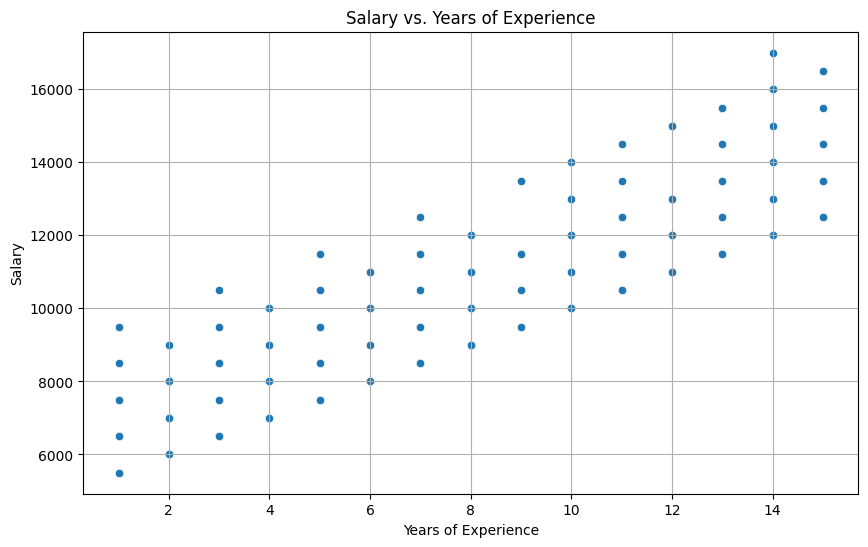

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to a pandas DataFrame for plotting
pandas_df = processed_df.select("Years Of Experience", "label").toPandas()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pandas_df, x="Years Of Experience", y="label")
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()